In [40]:
import tensorflow as tf

# TensorFlow
## What is Tensorflow?
TensorFlow is an open source software library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API.

## Tensorflow have multiple APIs
**Tensorflow Core:** This is the lowest level API and provides you with complete programming control. This is for ML researchers and others who require fine levels of control. 

**High-level APIs:**
Tensorflow Estimator (tf.estimator): It helps you manage data sets, estimators, training and inference. 


## What is a tensor? 
This is the central unit of TensorFlow. It consists of a set of primitive values shaped into an array of any number of dimensions. A tensor’s rank is its number of dimensions.

In [73]:
Scalar = tf.constant([2]) # a rank 0 tensor; a scalar with shape []
Vector = tf.constant([5,6,2]) # a rank 1 tensor; a vector with shape [3]
Matrix = tf.constant([[1,2,3], [2,3,4]]) # a rank 2 tensor; a matrix with shape [2, 3]
Tensor = tf.constant([[[1., 2., 3.]], [[7., 8., 9.]]]) # a rank 3 tensor with shape [2, 1, 3]

## Tensorflow Core (what we've been learning in Udacity)
TF Core programs have two discrete sections

*1) Building the computational graph*

*2) Running the computational graph*


## The Computation Graph
A *computational graph* is a series of TF operations arranged into a graph of nodes. Let’s think of a computation graph. Each node takes zero or more tensors as inputs and produces a tensor as an output. 

### Tensorflow constant
A *node type* is *TF constants*. It takes no inputs and it outputs a value it stores internally. For example:

In [48]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const_18:0", shape=(), dtype=float32) Tensor("Const_19:0", shape=(), dtype=float32)


Notice that printing the nodes does not output the values 3.0 and 4.0 as you might expect. Instead, they are nodes that, when evaluated, would produce 3.0 and 4.0, respectively. To actually evaluate the nodes, we must run the computational graph within a *session*. A session encapsulates the control and state of the TensorFlow runtime.

### Interpreting the constant
The following code creates a Session object and then invokes its run method to run enough of the computational graph to evaluate node1 and node2. By running the computational graph in a session as follows:

In [49]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


We can build more complicated computations by **combining Tensor nodes with operations** (Operations are also nodes). For example, we can add our two constant nodes and produce a new graph as follows:

In [50]:
from __future__ import print_function
node3 = tf.add(node1, node2)
print("node3:", node3)
print("sess.run(node3):", sess.run(node3))

node3: Tensor("Add:0", shape=(), dtype=float32)
sess.run(node3): 7.0


TensorFlow provides a utility called TensorBoard that can display a picture of the computational graph. Here is a screenshot showing how TensorBoard visualizes the graph:

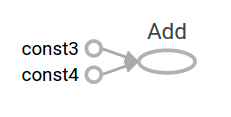

In [54]:
from IPython.display import Image
Image("addition.png")

As it stands, this graph is not especially interesting because it always produces a constant result. A graph can be parameterized to accept external inputs, known as **placeholders**. A placeholder is a **promise to provide a value later**.

In [55]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

The preceding three lines are a bit like a **function or a lambda** in which we define two input parameters (a and b) and then an operation on them. We can evaluate this graph with multiple inputs by using the feed_dict argument to the run method to feed concrete values to the placeholders:

In [56]:
print(sess.run(adder_node, {a: 3, b: 4.5}))
print(sess.run(adder_node, {a: [1, 3], b: [2, 4]}))

7.5
[3. 7.]


In TensorBoard, the graph looks like this:

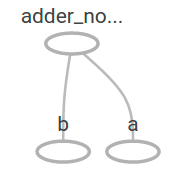

In [57]:
from IPython.display import Image
Image("placeholder_addition.png")

We can make things more complex by adding another operation:

In [58]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b: 4.5}))

22.5


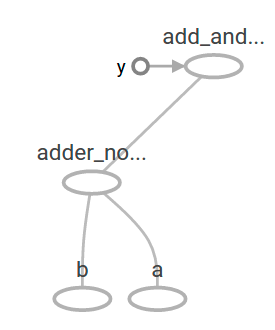

In [59]:
from IPython.display import Image
Image("add_triple.png")

In machine learning we will typically want a model that can take arbitrary inputs, such as the one above. To make the model trainable, we need to be able to modify the graph to get new outputs with the same input. **Variables** allow us to add trainable parameters to a graph. They are constructed with a type and initial value:

In [60]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b

Constants are initialized when you call tf.constant, and their value can never change. By contrast, **variables are not initialized when you call tf.Variable**. To initialize all the variables in a TensorFlow program, you must explicitly call a special operation as follows:

In [61]:
init = tf.global_variables_initializer()
sess.run(init)

It is important to realize init is a handle to the TensorFlow sub-graph that initializes all the global variables. Until we call sess.run, the variables are uninitialized.

Since x is a **placeholder**, we can evaluate linear_model for several values of x simultaneously as follows:



In [62]:
print(sess.run(linear_model, {x: [1, 2, 3, 4]}))

[0.         0.3        0.6        0.90000004]


We've created a model, but we *don't know* how good it is yet. To evaluate the model on training data, we need a **y placeholder** to provide the desired values, and we need to write a *loss function*.

A loss function measures how far apart the current model is from the provided data. We'll use a standard loss model for linear regression, which sums the squares of the deltas between the current model and the provided data. **linear_model - y** creates a vector where each element is the corresponding example's error delta. We call **tf.square** to square that error. Then, we sum all the squared errors to create a single scalar that abstracts the error of all examples using **tf.reduce_sum**:

In [63]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

23.66


We could improve this manually by reassigning the values of **W** and **b** to the perfect values of -1 and 1. A variable is initialized to the value provided to **tf.Variable** but can be changed using operations like **tf.assign**. For example, **W=-1** and **b=1** are the optimal parameters for our model. We can change **W** and **b** accordingly:

In [64]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

0.0


We guessed the **"perfect" values** of W and b, but the whole point of machine learning is to find the correct model parameters automatically. We will show how to accomplish this in the next section.

### tf.train API
A complete discussion of machine learning is out of the scope of this tutorial. However, TensorFlow provides **optimizers** that slowly change each variable in order to minimize the loss function. The simplest optimizer is **gradient descent**. It modifies each variable according to the magnitude of the derivative of loss with respect to that variable. In general, computing symbolic derivatives manually is tedious and error-prone. Consequently, TensorFlow can automatically produce derivatives given only a description of the model using the function tf.gradients. For simplicity, optimizers typically do this for you. For example,

In [65]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [66]:
sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
  sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


Now we have done actual machine learning! Although this simple linear regression model does not require much TensorFlow core code, more complicated models and methods to feed data into your models necessitate more code. Thus, TensorFlow provides higher level abstractions for common patterns, structures, and functionality. We will learn how to use some of these abstractions in the next section.

The complete program is below:

In [67]:
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))


W: [-0.9999969] b: [0.9999908] loss: 5.6999738e-11


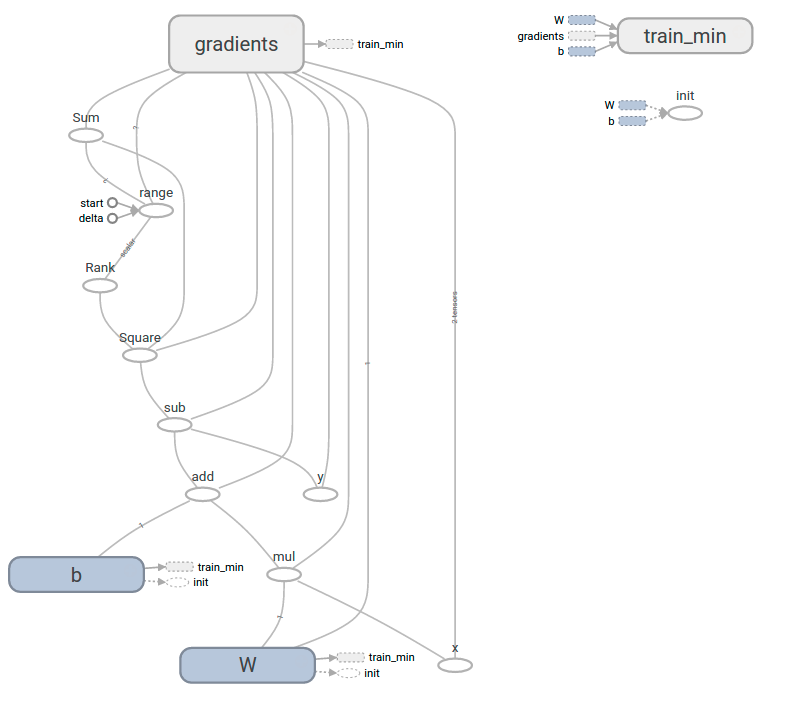

In [69]:
from IPython.display import Image
Image("model.png")

In [76]:
d = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])

In [77]:
d.shape

(3, 3)